In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [2]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [3]:
#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  


In [4]:
#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())


Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [5]:
#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100) 

In [6]:
#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

Persentase missing value kolom Quantity: 4.0%


In [7]:
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

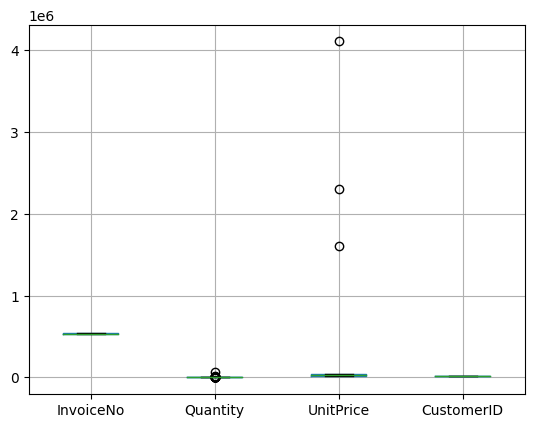

In [8]:
plt.style.use('default')

uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [9]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

IQR

16000.0

In [10]:
#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR )) | (uncleaned_raw[['UnitPrice']] > (Q3 - 1.5 * IQR)))]

In [11]:
#check for duplication
print(uncleaned_raw.duplicated(subset=None))

0      False
1       True
2       True
3       True
4       True
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


In [12]:
#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()